# Principal Component Analysis

It is used to extract the uncorrelated features out of the feature space so as to decrease the dimensity of the feature space.

We need to standarize the data before we can apply the principal component anaylysis

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [35]:
data=load_iris()

In [100]:
X=pd.DataFrame(data['data'])
y=data['target']
X.columns=['s_length','s_width','p_length','p_width']
print(X.head())

   s_length  s_width  p_length  p_width
0       5.1      3.5       1.4      0.2
1       4.9      3.0       1.4      0.2
2       4.7      3.2       1.3      0.2
3       4.6      3.1       1.5      0.2
4       5.0      3.6       1.4      0.2


In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
#x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=33,stratify=y)

In [49]:
#x_train=pd.DataFrame(x_train)
#x_train.columns=['s_length','s_width','p_length','p_width']


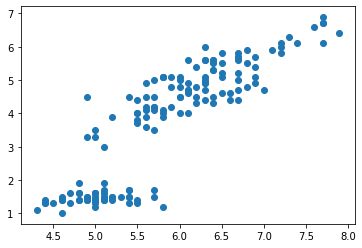

In [102]:
plt.scatter(X['s_length'],X['p_length'])

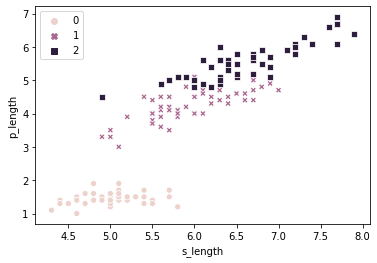

In [105]:
sns.scatterplot(X['s_length'],X['p_length'],hue=y,style=y)

# Standardize the data

In [52]:
X=StandardScaler().fit_transform(X)

In [54]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# Compute the eigenvectors and eigenvalues

In [56]:
#covariance matrix
covariance_matrix= np.cov(X.T)
print("the covariance matrix is \n",covariance_matrix)

the covariance matrix is 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [58]:
# compute the eigenvalues and eigenvectors
eigen_values,eigen_vector = np.linalg.eig(covariance_matrix)
print("the eigen values are \n",eigen_values)
print("\nthe eigenvectors are \n",eigen_vector)

the eigen values are 
 [2.93808505 0.9201649  0.14774182 0.02085386]

the eigenvectors are 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [59]:
for val in eigen_values:
    print(val)

2.9380850501999927
0.9201649041624892
0.1477418210449476
0.020853862176462064


In [61]:
# the eigen vectors explain the total variance they explain about the data
variance_explained=[(i/sum(eigen_values)) for i in eigen_values]

In [62]:
variance_explained

[0.7296244541329983,
 0.22850761786701818,
 0.03668921889282866,
 0.005178709107154747]

# Now we need to project the data in the new dimensions

In [69]:
projection_matrix=eigen_vector.T

In [70]:
projection_matrix

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [79]:
projection_matrix=projection_matrix[:2,:].T

In [80]:
projection_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [81]:
# now projecting the data in the new dimensions
X_pca=X.dot(projection_matrix)

In [85]:
target_names=data['target_names']
print(target_names)

['setosa' 'versicolor' 'virginica']


In [91]:
new_data=pd.DataFrame(X_pca)
new_data.columns=['dimension1','dimension2']

In [92]:
new_data

,dimension1,dimension2
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835
5,-2.075631,-1.489178
6,-2.444029,-0.047644
7,-2.232847,-0.223148
8,-2.334640,1.115328
9,-2.184328,0.469014


In [93]:
new_data['target']=y

In [94]:
new_data

,dimension1,dimension2,target
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
5,-2.075631,-1.489178,0
6,-2.444029,-0.047644,0
7,-2.232847,-0.223148,0
8,-2.334640,1.115328,0
9,-2.184328,0.469014,0


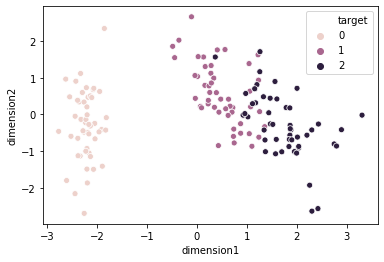

In [97]:
sns.scatterplot(new_data['dimension1'],new_data['dimension2'],hue=new_data['target'])